<a href="https://colab.research.google.com/github/nish700/Machine-Learning-Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Prediciton

##import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##upload file

In [0]:
loan_data = pd.read_csv('train_data.txt')

##analyse the data

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.describe()
#to check for null values in the numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###analysing the categorical data

In [5]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

##generating plots from data

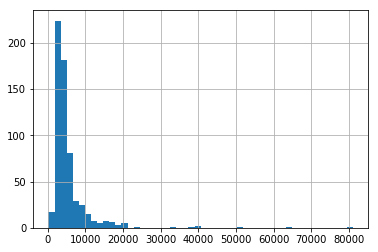

In [7]:
loan_data['ApplicantIncome'].hist(bins=50)

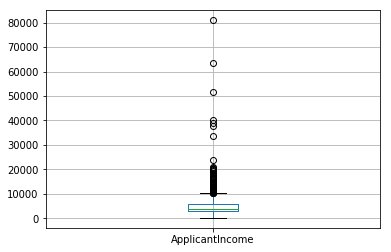

In [8]:
loan_data.boxplot(column='ApplicantIncome')

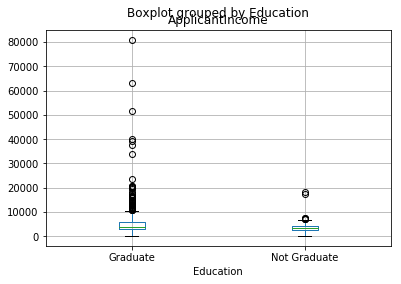

In [9]:
loan_data.boxplot(column='ApplicantIncome',by='Education')

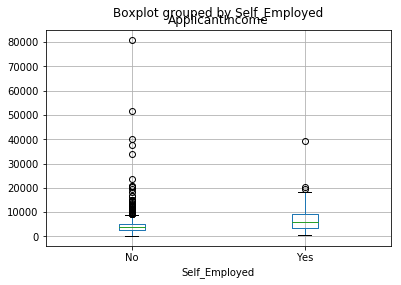

In [10]:
loan_data.boxplot(column='ApplicantIncome', by='Self_Employed')

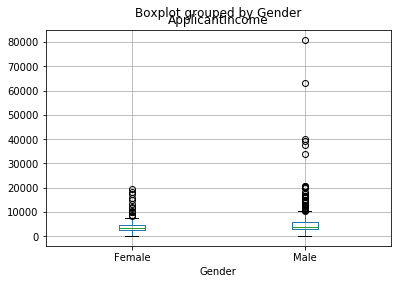

In [11]:
loan_data.boxplot(column='ApplicantIncome', by='Gender')

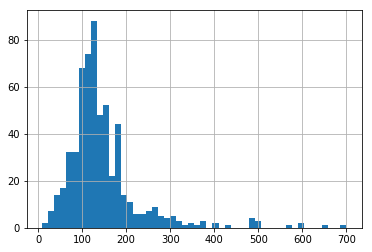

In [12]:
loan_data['LoanAmount'].hist(bins=50)

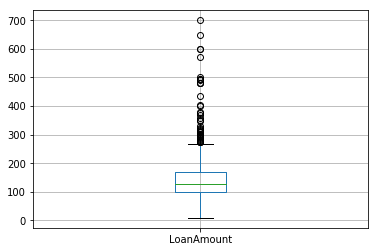

In [13]:
loan_data.boxplot(column='LoanAmount')

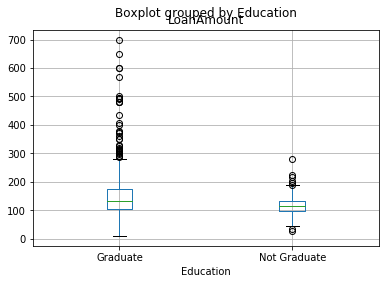

In [14]:
loan_data.boxplot(column='LoanAmount',by='Education')

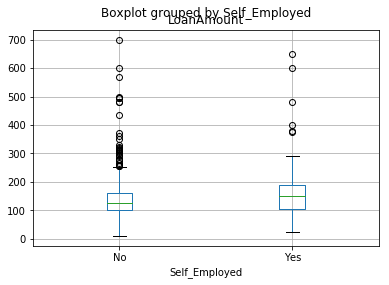

In [15]:
loan_data.boxplot(column='LoanAmount',by='Self_Employed')

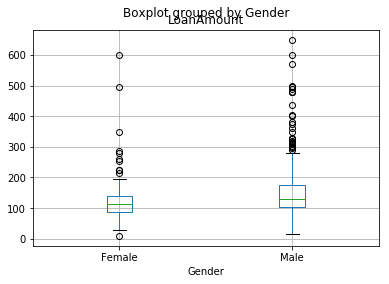

In [16]:
loan_data.boxplot(column='LoanAmount',by='Gender')

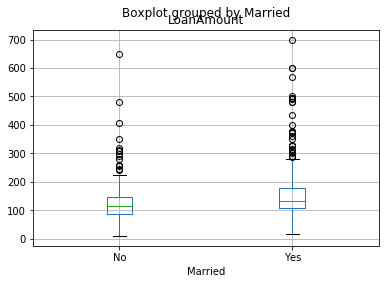

In [17]:
loan_data.boxplot(column='LoanAmount',by='Married')

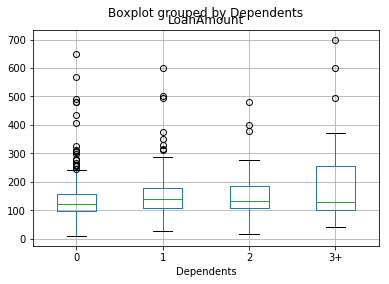

In [18]:
loan_data.boxplot(column='LoanAmount',by='Dependents')

###using pivot tables to identify the loan trends

In [19]:
temp1 = loan_data['Credit_History'].value_counts(ascending=True)
temp2 = loan_data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table  for credit history',temp1)
print('Probability of getting loan for each credit history class:',temp2)

Frequency Table  for credit history 0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each credit history class:                 Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [20]:
type(temp1)
type(temp2)

pandas.core.frame.DataFrame

##plotting the probabilities

Text(0.5, 1.0, 'credit history vs probability of getting loan')

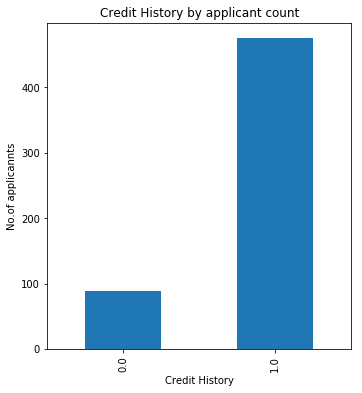

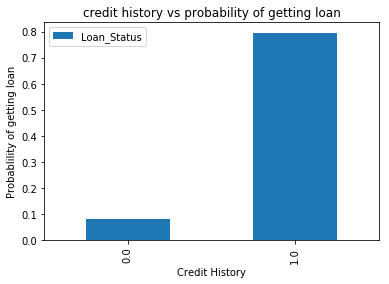

In [21]:
fig= plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit History')
ax1.set_ylabel('No.of applicannts')
ax1.set_title('Credit History by applicant count')

#ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Probablility of getting loan')
plt.title('credit history vs probability of getting loan')
#plt.show()'''

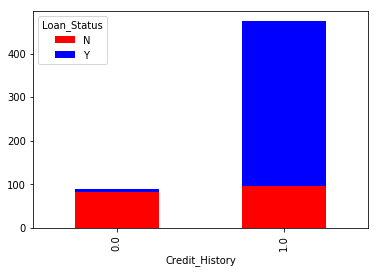

In [22]:
temp3 = pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [0]:
#temp4 = loan_data['Gender'].value_counts(ascending=True)
#temp5 = loan_data.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
#print('Frequency Table  for Gender',temp4)
# print('Probability of getting loan for each Gender class:',temp5)

In [0]:
#tempA = pd.crosstab(loan_data['Credit_History'],loan_data['LoanAmount'].groupby(loan_data['Gender']))
#tempA.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

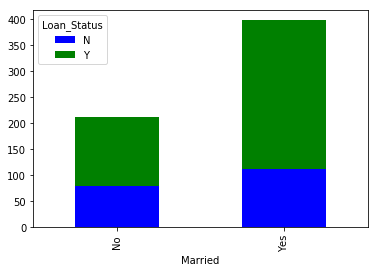

In [25]:
temp6 = pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
temp6.plot(kind='bar',stacked=True,color=['blue','green'],grid=False)

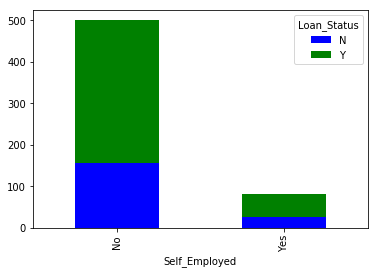

In [26]:
temp7 = pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
temp7.plot(kind='bar',stacked=True,color=['blue','green'],grid=False)

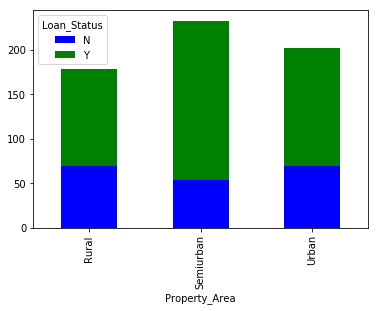

In [27]:
temp6 = pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
temp6.plot(kind='bar',stacked=True,color=['blue','green'],grid=False)

#Data Munging

###checking the missing values

In [28]:
#checking missing values in dataset
loan_data.isnull().any()
# check the number of null values per column in a dataframe
loan_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
# missing values can be filled using the mean value missing values 
#loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(),inplace=True)

In [30]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
loan_data['Self_Employed'].fillna('No',inplace=True)

###Imputing the values for missing LoanAmount

In [32]:
loan_amt_tbl = loan_data.pivot_table(values='LoanAmount',columns='Education',index='Self_Employed',aggfunc=np.median)
print(loan_amt_tbl)
loan_amt_tbl.iloc[1,1]

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


130.0

In [0]:
def fag(x):
  return loan_amt_tbl.loc[x['Self_Employed'],x['Education']]

In [0]:
loan_data['LoanAmount'].fillna(loan_data[loan_data['LoanAmount'].isnull()].apply(fag,axis=1),inplace=True)

###Making the distribution normal 

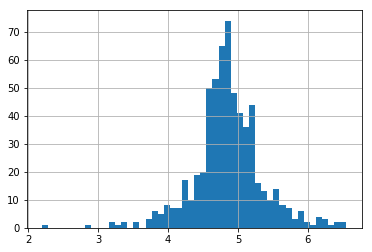

In [35]:
#loanAmount has a skewed distribution , need to make a normal distribution . this can be done by taking log of the data
loan_data['loanAmount_log']= np.log(loan_data['LoanAmount'])
loan_data['loanAmount_log'].hist(bins=50)

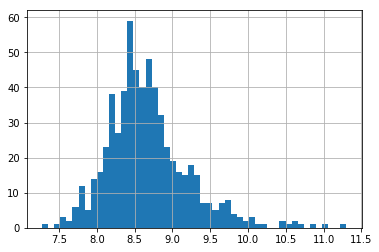

In [36]:
#Applicant Income has skewed distribution, add Applicant Income and Co Applicant Income to make a new feature , take log of it
loan_data['Applicant_Co_Income_Log'] = np.log(loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome'])
loan_data['Applicant_Co_Income_Log'].hist(bins=50)

###gender missing values imputing

In [37]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
#Seeing that more than 80% of the gender is Male , filling the missing values with Male would be appropriate
# filling with mode which gives max distribution
loan_data["Gender"].fillna(loan_data["Gender"].mode()[0],inplace=True)

###Imputing missing values for Married Column

In [39]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
##Seeing that only 3 values are missing in Married column and more than 65% of the repondents are Married ,
##it would be wise to fill the missing values with Yes for Married
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)

###Imputing missing values for Dependents Column

In [41]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
##Since more than 57% of the respondents have 0 dependents , so will prefer filling the missing values with 0
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)

###Imputing Missing Values for Loan Amount Term

In [43]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
##SInce the majority(85%) of repondents have a Loan Term of 360 months , so it would be wise to fill the missing(14) values with a term of 360
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)

###Imputing the missing values in Credit History Column

In [45]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
## Since around 85% of the respondents have a credit history of 1.0, so will prefer filling the missing values with 1.0
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

###Check once again for any null values

In [47]:
loan_data.isnull().any() # gives the presence of null value in any column (True/False)
loan_data.apply(lambda x: sum(x.isnull()),axis=0) # gives the count of Null values 

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
loanAmount_log             0
Applicant_Co_Income_Log    0
dtype: int64

###Convert Categories to Numerical Values

In [0]:
## This conversion is done as algorithms won't work on categories and need numerical data
loan_data['Gender'] = loan_data.Gender.astype('category').cat.codes
loan_data['Married']= loan_data.Married.astype('category').cat.codes
loan_data['Education']= loan_data.Education.astype('category').cat.codes
loan_data['Self_Employed'] = loan_data.Self_Employed.astype('category').cat.codes
loan_data['Property_Area'] = loan_data.Property_Area.astype('category').cat.codes
loan_data['Dependents']= loan_data.Dependents.astype('category').cat.codes
## save the loan_status categories in a column for accuracy


In [49]:
loan_data.head(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,Applicant_Co_Income_Log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,Y,4.867534,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,4.948760,8.699515
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y,5.587249,9.170872
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y,4.553877,8.255569
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,N,5.062595,8.619750
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,Y,5.123964,8.618305


## Generate Features and Labels from data

In [0]:
X = loan_data.drop(['Loan_ID','Loan_Status'], axis=1)
Y = loan_data['Loan_Status']
#Y_cat = loan_data['Loan_Status_cat']
#loan_data['Loan_Status_cat'] = loan_data['Loan_Status']
#loan_data['Loan_Status'] = loan_data.Loan_Status.astype('category').cat.codes

##Split the data 

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

**Split the data first into Train and Test sets and then standardise. Standardise the train data first and then tranform the test data through it **

In [53]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,random_state=0,stratify=Y)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)
print(type(X_train), type(X_val), type(Y_train), type(Y_val))

(460, 13) (154, 13) (460,) (154,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [0]:
Y_train_binarised = Y_train.astype('category').cat.codes
Y_val_binarised = Y_val.astype('category').cat.codes
print(Y_train_binarised,Y_val_binarised)

##Standardise the data

In [0]:
scaler = StandardScaler()

In [0]:
#first fit the model with train data and then tranform the train data
X_trained_scale = scaler.fit_transform(X_train)

In [0]:
#use the same model to transform the validation data , do not fit the test data, just transform it
X_val_scale = scaler.transform(X_val)

In [0]:
#scaling the output also with MinMaxScaler
minmaxscaler = MinMaxScaler()


In [0]:
Y_train_scaled = minmaxscaler.fit_transform(Y_train_binarised.values.reshape(-1,1))
Y_val_scaled = minmaxscaler.transform(Y_val_binarised.values.reshape(-1,1))

In [0]:
print(Y_train_scaled)
print(Y_val_scaled)

#Building a Predictive Model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score


In [0]:
classifiers =[('LogisticRegression',LogisticRegression()),
              ('RandomForestClassifier',RandomForestClassifier()),
              ('DecisionTreeClassifier',DecisionTreeClassifier())]

In [68]:
for names,clf in classifiers:
  
  clf.fit(X_trained_scale, Y_train_scaled)
  Y_pred = clf.predict(X_val_scale)
  
  accuracy = accuracy_score(Y_pred, Y_val_scaled)
  print('accuracy of classifier ', names , 'is: ' , accuracy)

accuracy of classifier  LogisticRegression is:  0.8376623376623377
accuracy of classifier  RandomForestClassifier is:  0.7792207792207793
accuracy of classifier  DecisionTreeClassifier is:  0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##Sigmoid Neuron Class

In [0]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [0]:
class SigmoidNeuron:
   
    def __init__(self):
      self.w= None
      self.b= None
      
    def sigmoid(self,x):
      return 1.0/(1.0 + np.exp(-x))
    
    def perceptron(self,x):
      return np.dot(x, self.w.T) + self.b
    
    def grad_w(self,x,y):
      y_pred = self.sigmoid(self.perceptron(x))
      return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
      y_pred = self.sigmoid(self.perceptron(x))
      return (y_pred -y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1, learning_rate=1, display_loss=False, initialise=True):
      
      if initialise:
        self.w = np.random.randn(1,X.shape[1])
        self.b = 0
        
      if display_loss:
        loss={}
        
      for e in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
        dw = 0
        db = 0
        
        for x,y in zip(X,Y):
          
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)
          
        self.w -= learning_rate * dw
        self.b -= learning_rate * db
        
        if display_loss:
          Y_pred = self.sigmoid(self.perceptron(X))
          loss[e] = mean_squared_error(Y_pred,Y)
      
      if display_loss:
        plt.plot(loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
         
    def predict(self,X):
      Y_pred=[]
      for x in X:
        y_pred = self.sigmoid(self.perceptron(x))
        Y_pred.append(y_pred)
        
      return np.array(Y_pred)

In [0]:
sns = SigmoidNeuron()

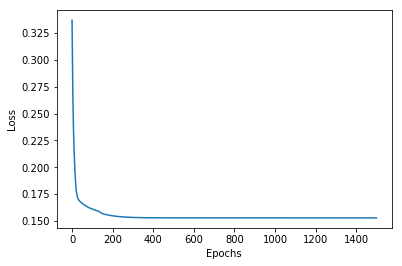

In [72]:
sns.fit(X_trained_scale,Y_train_scaled,learning_rate=0.007,epochs=1500,initialise=True,display_loss=True)

In [0]:
y_pred_train = sns.predict(X_trained_scale)
y_pred_val = sns.predict(X_val_scale)
#print(y_pred)
#print(Y_train)

In [0]:
y_pred_train_binarised = (y_pred_train>0.5).astype('float')
y_pred_val_binarised = (y_pred > 0.5).astype('float')

###checking the accuracy

In [0]:
accuracy_train = accuracy_score(Y_train_scaled,y_pred_train_binarised)
accuracy_val = accuracy_score(Y_val_scaled,y_pred_val_binarised)

In [95]:
print('accuracy for train set:', accuracy_train)
print('accuracy for validation set:', accuracy_val)

accuracy for train set: 0.8043478260869565
accuracy for validation set: 0.8376623376623377


#Preparing the test data

###upload the data

In [0]:
loan_test_data= pd.read_csv('test_data.txt')

In [97]:
loan_test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [98]:
loan_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


###check the count of null values

In [101]:
loan_test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

###Filling the null Categorical values with mode

In [0]:
loan_test_data['Gender'].fillna(loan_test_data['Gender'].mode()[0],inplace=True)

In [0]:
loan_test_data['Dependents'].fillna(loan_test_data['Dependents'].mode()[0],inplace=True)

In [0]:
loan_test_data['Self_Employed'].fillna(loan_test_data['Self_Employed'].mode()[0],inplace=True)

In [0]:
loan_data['Loan_Amount_Term'].value_counts()
loan_test_data['Loan_Amount_Term'].fillna(loan_test_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [0]:
loan_test_data['Credit_History'].value_counts()
loan_test_data['Credit_History'].fillna(loan_test_data['Credit_History'].mode()[0],inplace=True)

### Filling the null numerical values

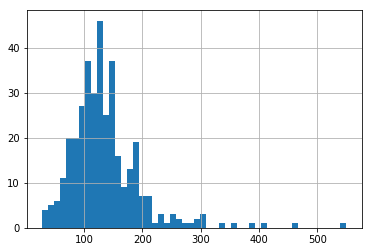

In [109]:
loan_test_data['LoanAmount'].hist(bins=50)

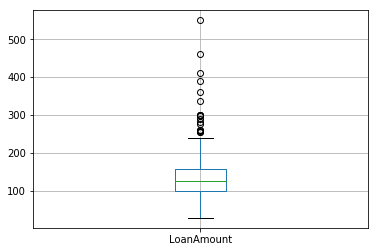

In [111]:
loan_test_data.boxplot(column='LoanAmount')

In [0]:
loan_amt_test_tbl = loan_test_data.pivot_table(values='LoanAmount',columns='Education',index='Self_Employed',aggfunc=np.median)
def fagTest(x):
  return loan_amt_test_tbl.loc[x['Self_Employed'],x['Education']]
loan_test_data['LoanAmount'].fillna(loan_test_data[loan_test_data['LoanAmount'].isnull()].apply(fagTest,axis=1),inplace=True)

In [115]:
loan_test_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

###for getting normal distribution

In [0]:
loan_test_data['LoanAmount_log']= np.log(loan_test_data['LoanAmount'])
loan_test_data['Applicant_Co_pay_log']= np.log(loan_test_data['ApplicantIncome'] + loan_test_data['CoapplicantIncome'])

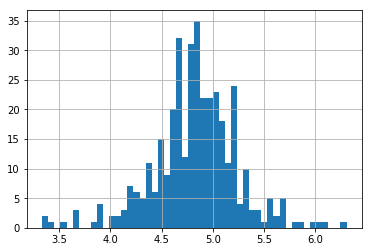

In [117]:
loan_test_data['LoanAmount_log'].hist(bins=50)

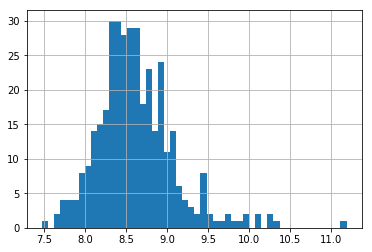

In [119]:
loan_test_data['Applicant_Co_pay_log'].hist(bins=50)

###handle Categorical data

In [120]:
loan_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Applicant_Co_pay_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,8.094378


In [0]:
loan_test_data['Gender'] = loan_test_data.Gender.astype('category').cat.codes
loan_test_data['Married'] = loan_test_data.Married.astype('category').cat.codes
loan_test_data['Dependents'] = loan_test_data.Dependents.astype('category').cat.codes
loan_test_data['Education'] = loan_test_data.Education.astype('category').cat.codes
loan_test_data['Self_Employed'] = loan_test_data.Self_Employed.astype('category').cat.codes
loan_test_data['Property_Area'] = loan_test_data.Property_Area.astype('category').cat.codes

In [122]:
loan_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Applicant_Co_pay_log
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,8.651724
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,8.428581
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,8.824678
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,8.494129
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,8.094378


##Standardising the test data

In [0]:
X_test = loan_test_data.drop('Loan_ID', axis=1)

In [0]:
scaler_test= StandardScaler()

In [0]:
X_test_scaled = scaler_test.fit_transform(X_test)

In [0]:
Y_pred_test = sns.predict(X_test_scaled)

In [153]:
Y_pred_test_binarised = (Y_pred_test > 0.5).astype('int')

(367,)

##Submission

In [0]:
loan_test_data['Loan_ID'].shape
Y_pred_test_binarised

In [154]:
submission = pd.DataFrame({'Loan_ID':loan_test_data['Loan_ID'],'Loan_Status':Y_pred_test_binarised.ravel()})
submission = submission[['Loan_ID','Loan_Status']]
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [0]:
submission.to_csv('submission.csv',index=False)